In [ ]:
#Phase ID       Phase
#1             Preparation
#2             Dividing Ligament and Peritoneum
#3             Dividing Uterine Vessels and Ligament
#4             Transecting the Vagina
#5             Specimen Removal
#6             Suturing
#7             Washing



#Splitting
#01-10 for training, 11-14 for validation and 15-21 for testing




In [1]:
from DataPreparaion import DataPreparation
from LabelPreparation import LabelPrep
from LabelPreparation import Train_Test


In [ ]:

#train images
#video_path="videos/video/video01/"
#save_path="frames/"
#label_path="labels/"
#dp=DataPreparation(video_path,save_path,label_path)
#dp.get_frames()

In [ ]:
#video_path="videos/video/"
#save_path="frames/"
#label_path="labels/"
#dp=DataPreparation(video_path,save_path,label_path)
#dp.get_frames()

In [2]:
#train images into array
train_file_path="frames/01/"
tt=Train_Test(train_file_path)
train_images=tt.into_array()
train_images.shape



(6388, 250, 250)

In [3]:
import numpy as np
#train labels
label_path="labels/"
lp=LabelPrep(label_path,"01")
train_label_df=lp.prep_label()
train_label_df.shape
train_label_df.head()
print(np.unique(train_label_df))
print(train_label_df.shape)




[2 3 4 6 7]
(6388, 1)


In [ ]:
#test images
#video_path="videos/video/video02/"
#save_path="frames/"
#label_path="labels/"
#dp=DataPreparation(video_path,save_path,label_path)
#dp.get_frames()

In [4]:
#test images into array
test_file_path="frames/02/"
tt=Train_Test(test_file_path)
test_images=tt.into_array()
test_images.shape

(3560, 250, 250)

In [5]:
#test labels
label_path="labels/"
lp=LabelPrep(label_path,"02")
test_label_df=lp.prep_label()
test_label_df.shape
# train df doesn't contains  the 5. class 
test_label_df=test_label_df[test_label_df['Phase']!=5]


print(np.unique(test_label_df))
print(test_label_df.shape)


[2 3 4 6 7]
(3560, 1)


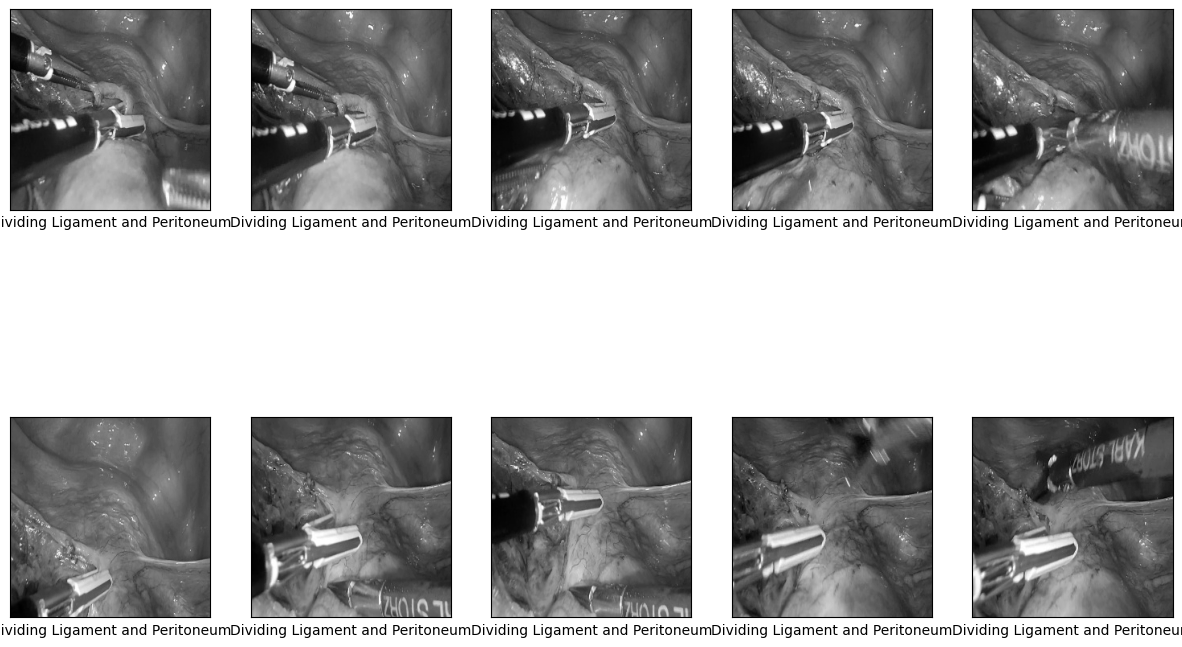

In [6]:
import matplotlib.pyplot as plt
#testing
#Phase ID       Phase
#1             Preparation
#2             Dividing Ligament and Peritoneum
#3             Dividing Uterine Vessels and Ligament
#4             Transecting the Vagina
#5             Specimen Removal
#6             Suturing
#7             Washing
class_names=['Preparation','Dividing Ligament and Peritoneum','Dividing Uterine Vessels and Ligament',
             'Transecting the Vagina','Specimen Removal','Suturing','Washing']
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap='gray')
    plt.xlabel(class_names[train_label_df.iloc[i]['Phase']-1])

plt.show()








Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 125, 125, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 125, 125, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 64)        0         
 g2D)                                                

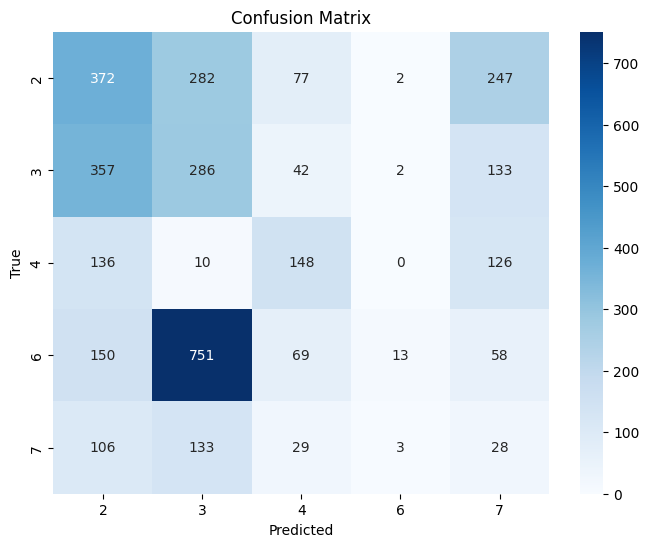

Test loss:  2.9557902812957764
Test accuracy:  0.237921342253685


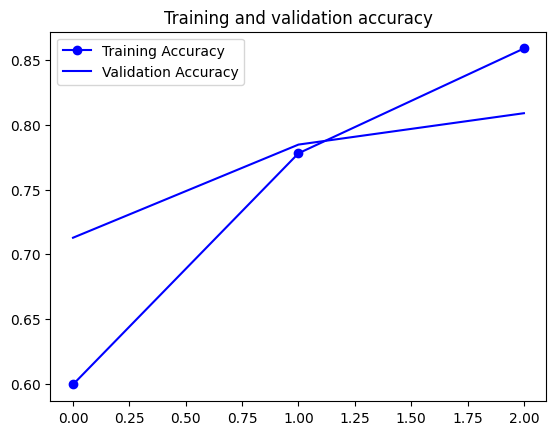

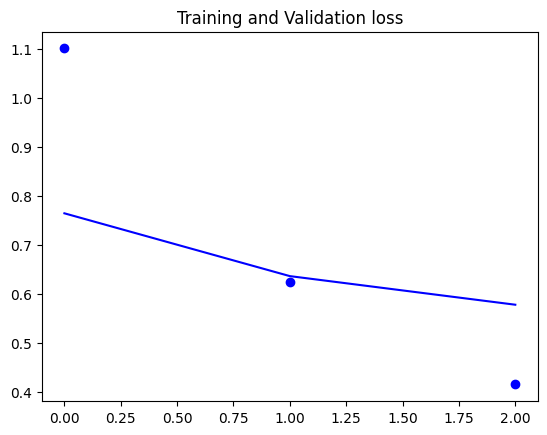

In [7]:
from ModelPreparation import Build_model
bd=Build_model(train_images,test_images,train_label_df,test_label_df)
bd.train_model()
bd.plot_accu()

In [ ]:
@article{wang2022autolaparo,
  title={AutoLaparo: A New Dataset of Integrated Multi-tasks for Image-guided Surgical Automation in Laparoscopic Hysterectomy},
  author={Wang, Ziyi and Lu, Bo and Long, Yonghao and Zhong, Fangxun and Cheung, Tak-Hong and Dou, Qi and Liu, Yunhui},
  journal={arXiv preprint arXiv:2208.02049},
  year={2022}
}